#### <strong>第一次作品：主成分分析實作</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標1</font>：

 本研究旨在透過主成分分析（PCA）探索義大利某個地區三個紅酒製造商所生產的178支紅酒的13種化學成分之間的關係。具體而言，我們將對紅酒樣本中的化學成分進行降維，以便將高維資料轉換為二維和三維空間，並且將資料可視化成散佈圖和立體圖，以便更好地理解資料的結構和模式。

透過主成分分析，希望能夠瞭解：
1. 哪些化學成分對於區分不同紅酒樣本是最具影響力的。
1. 探索不同紅酒樣本之間的相似性和差異性。
1. 識別可能存在的集群結構，並評估不同紅酒製造商所生產的紅酒之間的差異。
1. 進一步研究潛在的分群模式，以便了解可能影響紅酒品質的因素。




<hr>

習題1

第 1 題：

共變異矩陣(Covariance Matrix)是觀察兩個變數之間關係較常用的統計量。
繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

 <font color=lightsteelblue>以下程式碼的主要目的是對載入的 Excel 資料進行標準化處理，計算其相關係數並以HeatMap的形式視覺化。

其中利用到 Scikit-learn 中的套件 'StandardScaler' ，將用於對資料進行標準化處理。

'categories = df.columns'是將 df 的欄位名稱存入 categories 變數中，以便後續使用。

'scaler.fit(ratings)'是計算原始資料 ratings 中的平均值和標準差並利用於後續的標準化。

原始資料 ratings 中的資料標準化後，將結果存入 ratings_ 變數中。

'R = df.corr()'將計算 df 中各欄位之間的相關係數結果存入 R 變數中。

最後使用 Seaborn 的 heatmap 函式繪製相關係數矩陣的熱度圖，其中 annot=True 表示在每個方格中顯示相關係數的數值。</font>



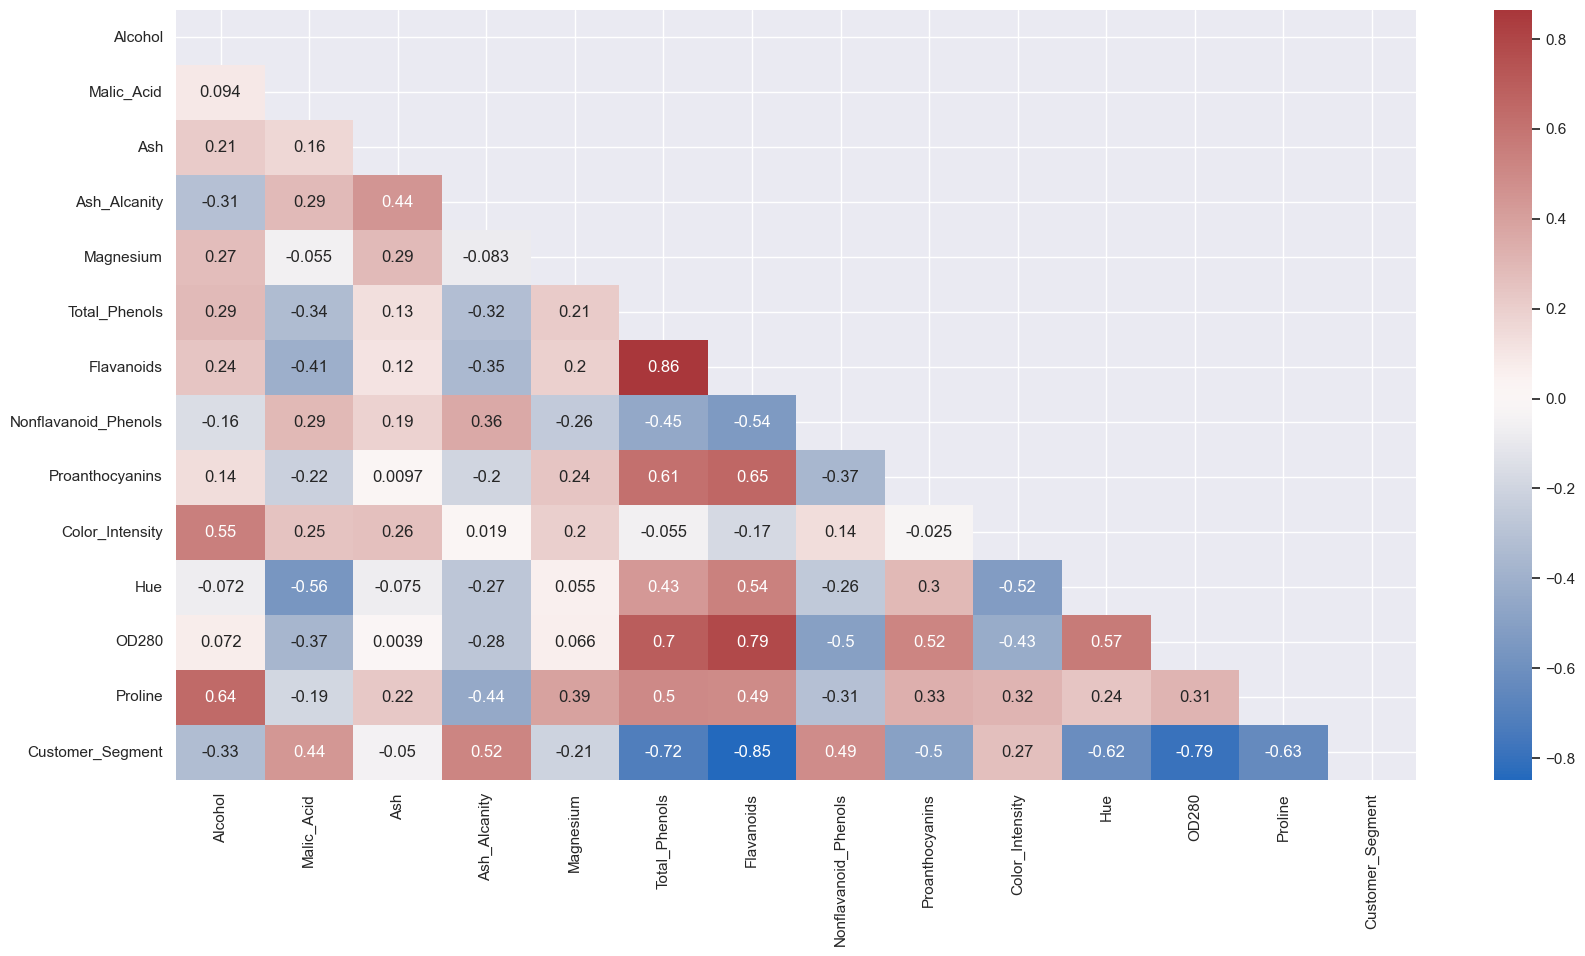

In [2]:
import seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/wine.xlsx') 
ratings = np.array(df)
categories = df.columns

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)

df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mas 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
seaborn.set(rc={'figure.figsize':(20,10)})

 <font color=mediumseagreen>觀察</font>：

透過所產生的 HeatMap 可以觀察到相關係數最高的數值 0.86 出現在 Flavanoids 類黃酮與 Total_Phenols 總酚類化合物之間。
葡萄酒中存在的天然酚類，是扮演著影響葡萄酒味道、顏色、口感的重要角色，同時也是眾所週知酒中的抗氧化物。其中酚類又可以分為類黃酮（如花青素、黃酮醇等）
與非類黃酮（如酚酸、耆等）。因此 Flavanoids 類黃酮是在 Total_Phenols 總酚類化合物之下的一部分，相關係數因而達到 0.86。

<hr>
習題1

第 2 題：

欲了解葡萄酒中每個化學成分的資料分布情況。


 <font color=lightsteelblue>以下程式碼將繪製一張含每個化學成分的盒鬚圖，並在觀察每個變數的 scaling後，繪製一張標準化後的盒鬚圖。</font>

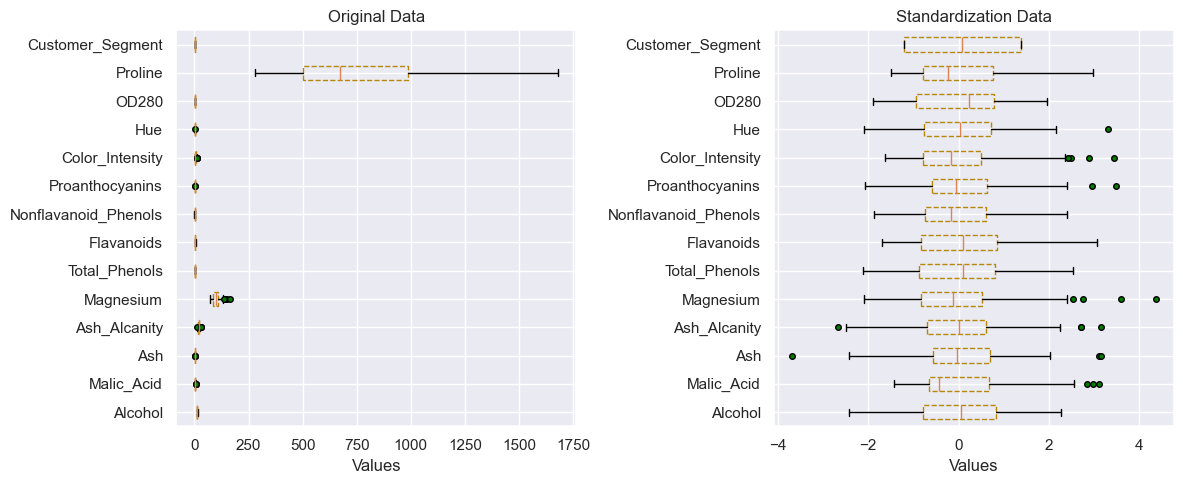

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/wine.xlsx') 
ratings = np.array(df)
categories = df.columns

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data box plot
axes[0].boxplot(ratings, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')

# Standardized data box plot
axes[1].boxplot(ratings_, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('Standardization Data')

plt.tight_layout()
plt.show()




 <font color=mediumseagreen>觀察</font>：

透過觀察原始資料變數的盒鬚圖，可以發現脯胺酸 Proline 的資料分布、級距等與其他化學物質差異非常大。可能是因為脯胺酸是葡萄酒中佔比最多的胺基酸，它能夠增加口感、甜味與水果風味。而這樣的資料型態不利於之後的主成分分析，因此需要做標準化的動作，確保不會遺失某些變數淺在的重要性。

<hr>
習題1

第 3 題：

進行主成分分析

 <font color=lightsteelblue>以下程式碼將繪製特徵值由大而小的分布與 scree plot。</font>

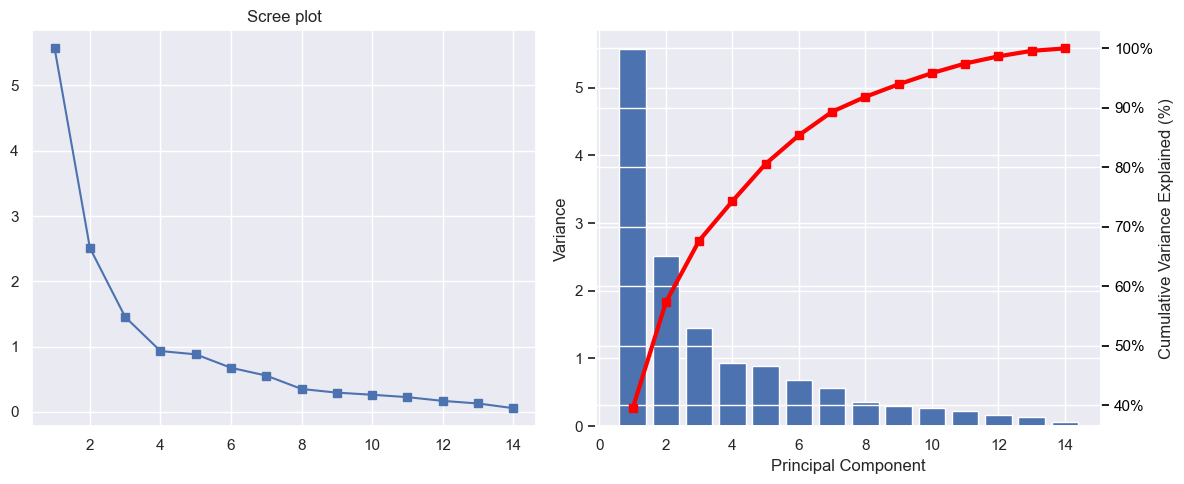

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ratings_ is assumed to be a 329 by 9 data matrix

# Calculate covariance matrix
Sx = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis=0)
Tmp = ratings_ - mu_x
Sx_formula = Tmp.T @ Tmp / (N - 1)

# Compute eigenvalues and eigenvectors
w, v = np.linalg.eig(Sx)
idx = np.argsort(-w)  # sort eigenvalues in descending order
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(1, 1 + len(eigvals))
axes[0].plot(x, eigvals, marker='s')
axes[0].set_title('Scree plot')
axes[0].grid(True)

# Bar plot with cumulative variance explained
axes[1].bar(x, eigvals)
axes2 = axes[1].twinx()
axes2.plot(x, eigvals.cumsum() / eigvals.sum() * 100, marker='s', color='red', lw=3)
axes2.tick_params(axis='y', colors='black')
axes2.yaxis.set_major_formatter(PercentFormatter())
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Variance')
axes2.set_ylabel('Cumulative Variance Explained (%)')

plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

左圖表顯示了每個主成分的特徵值（eigenvalues），特徵值表示了原始資料中每個主成分（eigenvector）所對應的變異量大小。
點與點之間斜率的變代表著該主成分所解釋的變異量大小。如果某條直線的斜率突然平緩，這表明添加更多主成分對總變異的解釋不太重要。
因此根據左圖，可以到第一個主成分到第四個主成分之間的斜率皆較大且為遞減，表示若添加第四個以後的主成分對於總變異無太多影響。

右圖顯示了每個主成分的特徵值以及累積的方差百分比。
紅色曲線代表累積變異百分比，橫軸同樣是主成分的編號。當主成分的數量增加時，該曲線顯示了對總體變異量的解釋程度如何逐漸增加。
長條圖則顯示了每個主成分的特徵值，即每個主成分解釋的單獨變異量。

通過這兩個圖表，可以了解主成分分析的結果。主成分的數量如何影響總體變異的解釋程度，以及哪些主成分對解釋總體變異最具貢獻。

<hr>
習題1

第 4 題：

資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別

習題1

第 5 題：

並依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


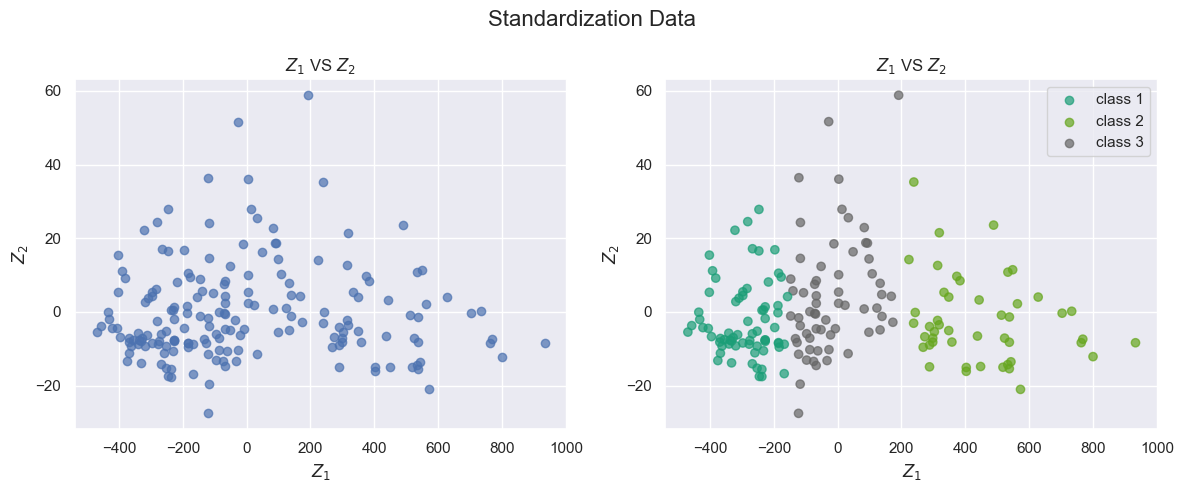

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(1)
labels = np.random.randint(0, 2, size=ratings.shape[0])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ratings)

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(principal_components)

# Scatter plot of the first two principal components with color-coded clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
axes[1].scatter(pc1, pc2, c=clusters, cmap='Dark2', alpha=0.7)
axes[1].set_title('$Z_1$ VS $Z_2$')
axes[1].set_xlabel('$Z_1$')
axes[1].set_ylabel('$Z_2$')
axes[1].grid(True)

# Scatter plot for the second subplot
axes[0].scatter(pc1, pc2, alpha=0.7)
axes[0].set_title('$Z_1$ VS $Z_2$')
axes[0].set_xlabel('$Z_1$')
axes[0].set_ylabel('$Z_2$')
axes[0].grid(True)

# Add labels for each cluster with custom colors
colors = plt.cm.Dark2(np.linspace(0, 1, 3))  # Get colors from viridis colormap
for i, color in enumerate(colors):
    axes[1].scatter([], [], color=color, label=f'class {i+1}', alpha=0.7)

axes[1].legend()

fig.suptitle('Standardization Data', fontsize=16)
plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

通過PCA將原始資料轉換為二維空間中的兩個主成分（principal components）。並對這兩個主成分進行聚類，並將每個資料點分配到對應的群中。
左圖顯示了原始資料在二維空間中的分佈。右圖則是在第一個子圖的基礎上，將資料點按照分群結果使用顏色分類。

而圖中每個點代表一個資料點，它的位置由它在第一個主成分和第二個主成分上的投影決定。通過圖中的 label，可以清楚地看到每個分群的範圍以及資料點分布的情況。


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


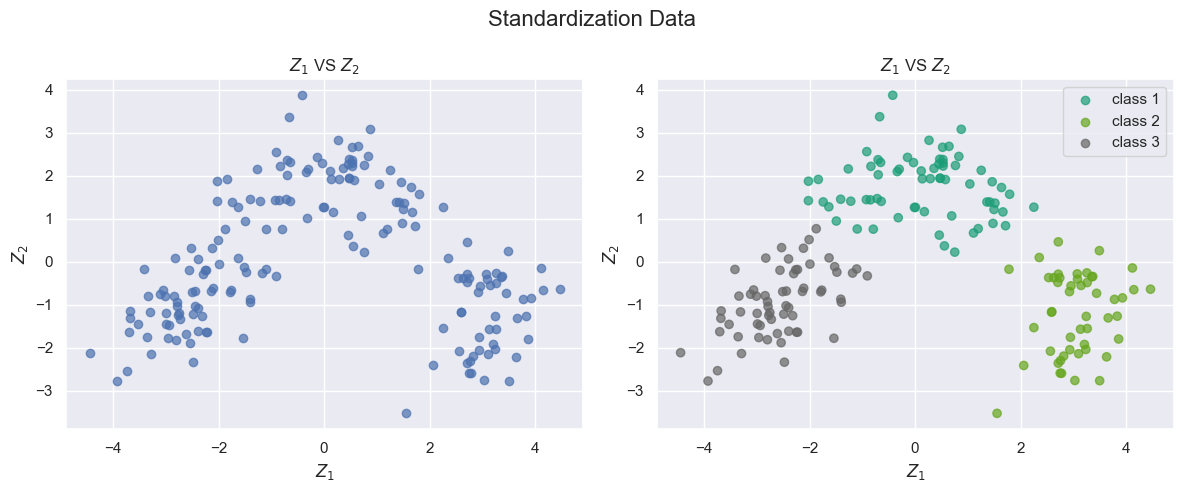

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(0)
labels = np.random.randint(0, 2, size=ratings_.shape[0])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ratings_)

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(principal_components)

# Scatter plot of the first two principal components with color-coded clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
axes[1].scatter(pc1, pc2, c=clusters, cmap='Dark2', alpha=0.7)
axes[1].set_title('$Z_1$ VS $Z_2$')
axes[1].set_xlabel('$Z_1$')
axes[1].set_ylabel('$Z_2$')
axes[1].grid(True)

# Scatter plot for the second subplot
axes[0].scatter(pc1, pc2, alpha=0.7)
axes[0].set_title('$Z_1$ VS $Z_2$')
axes[0].set_xlabel('$Z_1$')
axes[0].set_ylabel('$Z_2$')
axes[0].grid(True)

# Add labels for each cluster with custom colors
colors = plt.cm.Dark2(np.linspace(0, 1, 3))  # Get colors from viridis colormap
for i, color in enumerate(colors):
    axes[1].scatter([], [], color=color, label=f'class {i+1}', alpha=0.7)

axes[1].legend()

fig.suptitle('Standardization Data', fontsize=16)
plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

透過於資料的標準化處理後，會導致結果與先前的原始資料PCA有些不同。
由於資料已經經過標準化處理，因此資料在每個特徵的尺度是一致的，可能更容易顯示出資料的分佈形狀。
因此使用原始資料經過標準化處理的情況下，我們可以更好地觀察到資料的分佈形狀和模式。

<hr>
習題1

第 6 題：

如果採三個主成分，則可繪製立體圖。觀察立體圖是否比平面圖具備更好的群組分辨能力，並嘗試旋轉立體圖的角度以取得最好的辨別視野。

 <font color=lightsteelblue>以下程式碼的目標是對三個主成分進行視覺化，以及展示在主成分空間中使用的分群分析。</font>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


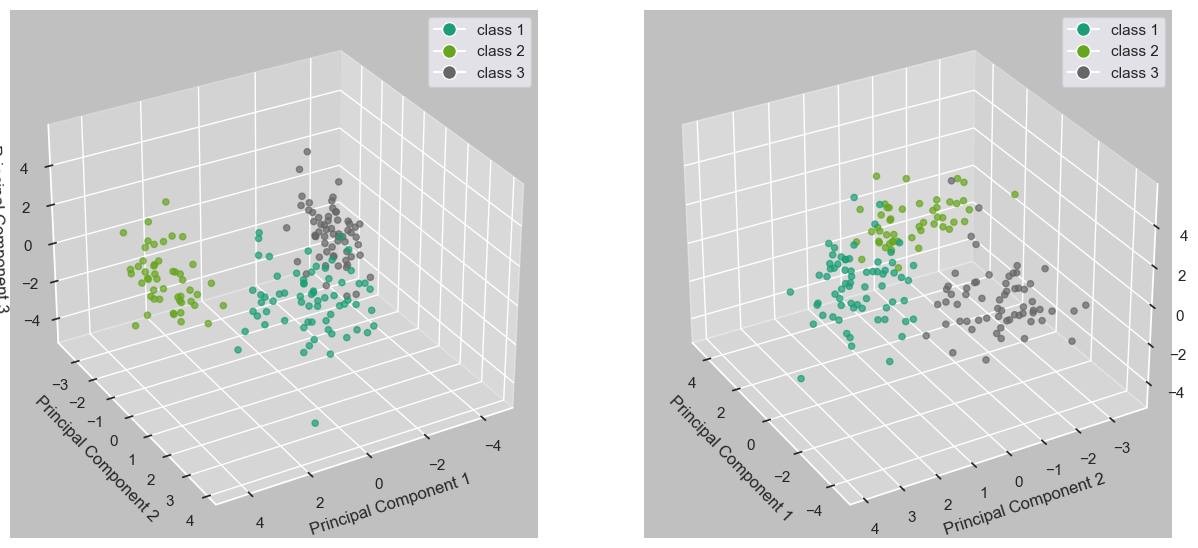

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors  # Import mcolors for colormap manipulation

# Ensure 3D plots are interactive
plt.ion()

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(0)
labels = np.random.randint(0, 2, size=ratings_.shape[0])

# Perform PCA with three components
pca = PCA(n_components=3)  # Set n_components to 3 for three principal components
principal_components = pca.fit_transform(ratings_)

# Extract the first three principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(principal_components)

# Set background color
fig = plt.figure(figsize=(15, 7))

# Plot the original 3D scatter plot (left subplot)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_facecolor('#C0C0C0')
scatter1 = ax1.scatter(pc1, pc2, pc3, c=clusters, cmap='Dark2', alpha=0.7)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.view_init(elev=30, azim=60)  # Change the viewing angle

# Plot the 3D scatter plot with adjusted viewing angle (right subplot)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_facecolor('#C0C0C0')
scatter2 = ax2.scatter(pc1, pc2, pc3, c=clusters, cmap='Dark2', alpha=0.7)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.view_init(elev=30, azim=150)  # Change the viewing angle

# Add legend with custom color labels to the second subplot
cmap = plt.get_cmap('Dark2')
norm = mcolors.Normalize(vmin=0, vmax=2)
viridis_colors = [cmap(norm(i)) for i in range(3)]
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[0], markersize=10, label='class 1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[1], markersize=10, label='class 2'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[2], markersize=10, label='class 3')]
ax2.legend(handles=legend_elements)
ax1.legend(handles=legend_elements)


plt.show()


 <font color=mediumseagreen>觀察</font>：

透過PCA，我們可以將原始資料投影到新的特徵空間中，其中每個主成分代表了原始資料中的不同方向。立體圖中展示了前三個主成分所代表的方向。
再透過散佈圖，我們可以看到資料點在主成分空間中的分佈情況。每個點的位置由其在前三個主成分上的投影決定。
再透過不同顏色的點表示不同的群組，可以直接的觀察到不同群之間的區別性。

<hr>
習題1

第 7 題：

$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。



 <font color=lightsteelblue>以下程式碼將列出第一個主成分中各個變數的權重數值，並產生一張折線圖方便觀察哪個變數的權重對於主成分的影響是較大的。</font>

Alcohol: -0.1363250105467804
Malic_Acid: 0.22267638321348956
Ash: -0.0022579316200923927
Ash_Alcanity: 0.2242984888799989
Magnesium: -0.12463015905429388
Total_Phenols: -0.35926404246369203
Flavanoids: -0.390711714601656
Nonflavanoid_Phenols: 0.2670012025487281
Proanthocyanins: -0.27906250437010066
Color_Intensity: 0.08931829343620136
Hue: -0.27682264997995837
OD280: -0.3505261809792818
Proline: -0.2695152520358722
Customer_Segment: 0.39366953347340433


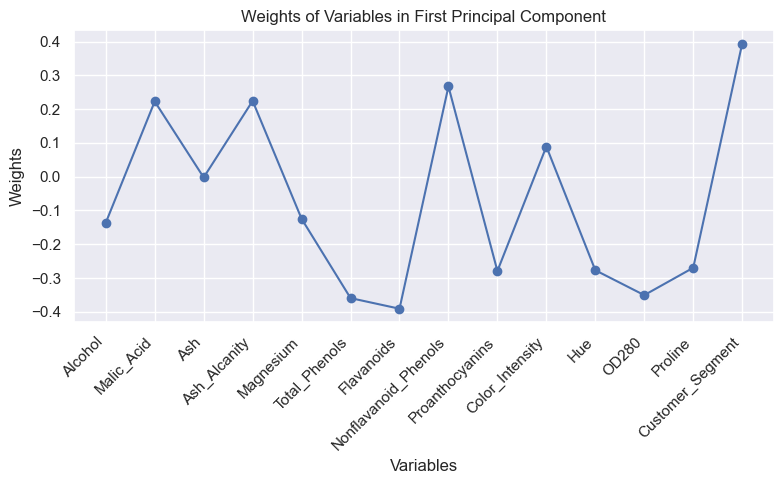

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 創建PCA實例
pca = PCA()

# 適配PCA模型
pca.fit(ratings_)

# 提取第一個主成分的權重
weights_first_pc_1 = pca.components_[0]

# 將權重與變數名稱對應起來
variables = categories
weights_and_variables_Z1 = list(zip(variables, weights_first_pc_1))

# 印出第一個主成分的權重與變數組合
for variable, weight in weights_and_variables_Z1:
    print(f"{variable}: {weight}")

# 解壓變數和權重
variables, weights = zip(*weights_and_variables_Z1)

# 繪製折線圖
plt.figure(figsize=(8, 5))
plt.plot(variables, weights, marker='o', linestyle='-')
plt.title('Weights of Variables in First Principal Component')
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.xticks(rotation=45, ha='right')  # 旋轉x軸標籤，以便更好顯示
plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

透過上述產生的權重與對應變數名稱，可以得知第一個主成分與原變數的關係為：
$$第一個主成分=-0.14*Alcohol+0.22*Malic\_Acid-0.002*Ash+......+0.39*Customer\_Segment$$
而影響主成分較顯著的變數中，最高的是 Flavanoids 黃酮類化合物、Total_Phenols 總酚類、OD280 蛋白質吸光度。其中黃酮類化合物是多酚的一種，而蛋白質吸光度則是會因為胺基酸芳香基團的組成不同而變化。

值得注意的是，權重影響最高的這三個變數在一開始所做的相關係數圖中，三個變數彼此間產生的三個相關係數分別是所有相關係數中最高的前三名。

Alcohol: -0.4841608681350917
Malic_Acid: -0.22359094697236837
Ash: -0.3158558839680648
Ash_Alcanity: 0.011615737312443737
Magnesium: -0.3005514323446538
Total_Phenols: -0.06711982882771679
Flavanoids: 0.0013134544409979974
Nonflavanoid_Phenols: -0.02698870280076304
Proanthocyanins: -0.041222563473476574
Color_Intensity: -0.529782739564546
Hue: 0.2779073538910832
OD280: 0.16277625035029786
Proline: -0.3660588621687466
Customer_Segment: -0.005690411534330494


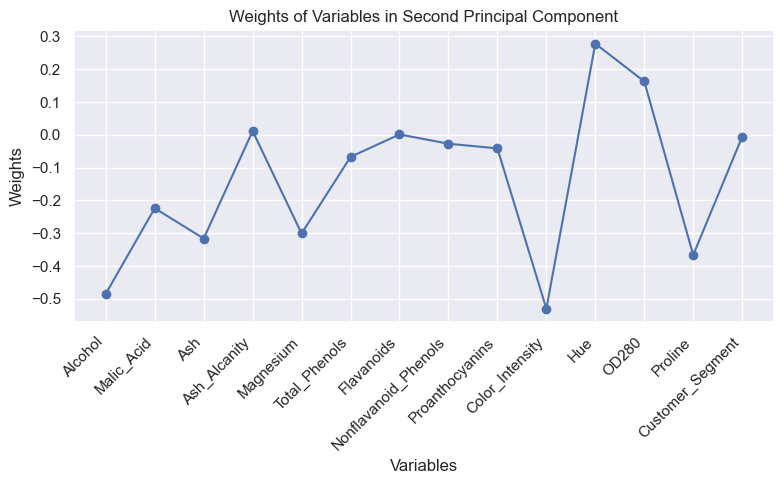

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 創建PCA實例
pca = PCA()

# 適配PCA模型
pca.fit(ratings_)

# 提取第一個主成分的權重
weights_first_pc_2 = pca.components_[1]

# 將權重與變數名稱對應起來
variables = categories
weights_and_variables_Z2 = list(zip(variables, weights_first_pc_2))

# 印出第一個主成分的權重與變數組合
for variable, weight in weights_and_variables_Z2:
    print(f"{variable}: {weight}")


# 解壓變數和權重
variables, weights = zip(*weights_and_variables_Z2)

# 繪製折線圖
plt.figure(figsize=(8, 5))
plt.plot(variables, weights, marker='o', linestyle='-')
plt.title('Weights of Variables in Second Principal Component')
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.xticks(rotation=45, ha='right')  # 旋轉x軸標籤，以便更好顯示
plt.tight_layout()
plt.show()



 <font color=mediumseagreen>觀察</font>：

透過上述產生的權重與對應變數名稱，可以得知第二個主成分與原變數的關係為：
$$第二個主成分=-0.48*Alcohol-0.22*Malic\_Acid-0.002*Ash+......-0.006*Customer\_Segment$$
而影響第二個主成分較顯著的變數中，最高的分別是 Color_Intensity 顏色強度、Alcohol 酒精、Ash 灰分、Magnesium 鎂。

從第二個主成分中，可以發現其中的這些權重較高的變數彼此間的相關係數都沒有第一個主成分中的變數高，驗證了主成分的變異量佔比會隨著順序遞減。



<hr>

 <font color=skyblue>作品目標2</font>：
 
旨在透過主成分分析（PCA）探索乳癌患者腫瘤影像量測資料的潛在結構及特徵。該資料集來自 sklearn.datasets，共包含 30 個不同的量測變數，涵蓋了 569 位患者的腫瘤影像資料。患者被區分為兩個主要群組：Malignant（惡性腫瘤）與 Benign（良性腫瘤）。主成分分析的目標是尋找這些量測變數中的主要模式和變異，以便更好地理解患者間的差異和群組間的特徵。透過PCA，我們將探索資料中的潛在結構，提取出最具代表性的特徵，並藉此評估這些特徵對於區分惡性和良性腫瘤的重要性，從而為乳癌患者的診斷和治療提供更深入的洞察。




<hr>

習題2

第 1 題：

繪製變數間的相關係數圖，以觀察變數間是否存在相關性

 <font color=lightsteelblue>以下程式碼將產生所有測量變數與其他變數的關關係數圖，並以HeatMap的形式呈現。</font>

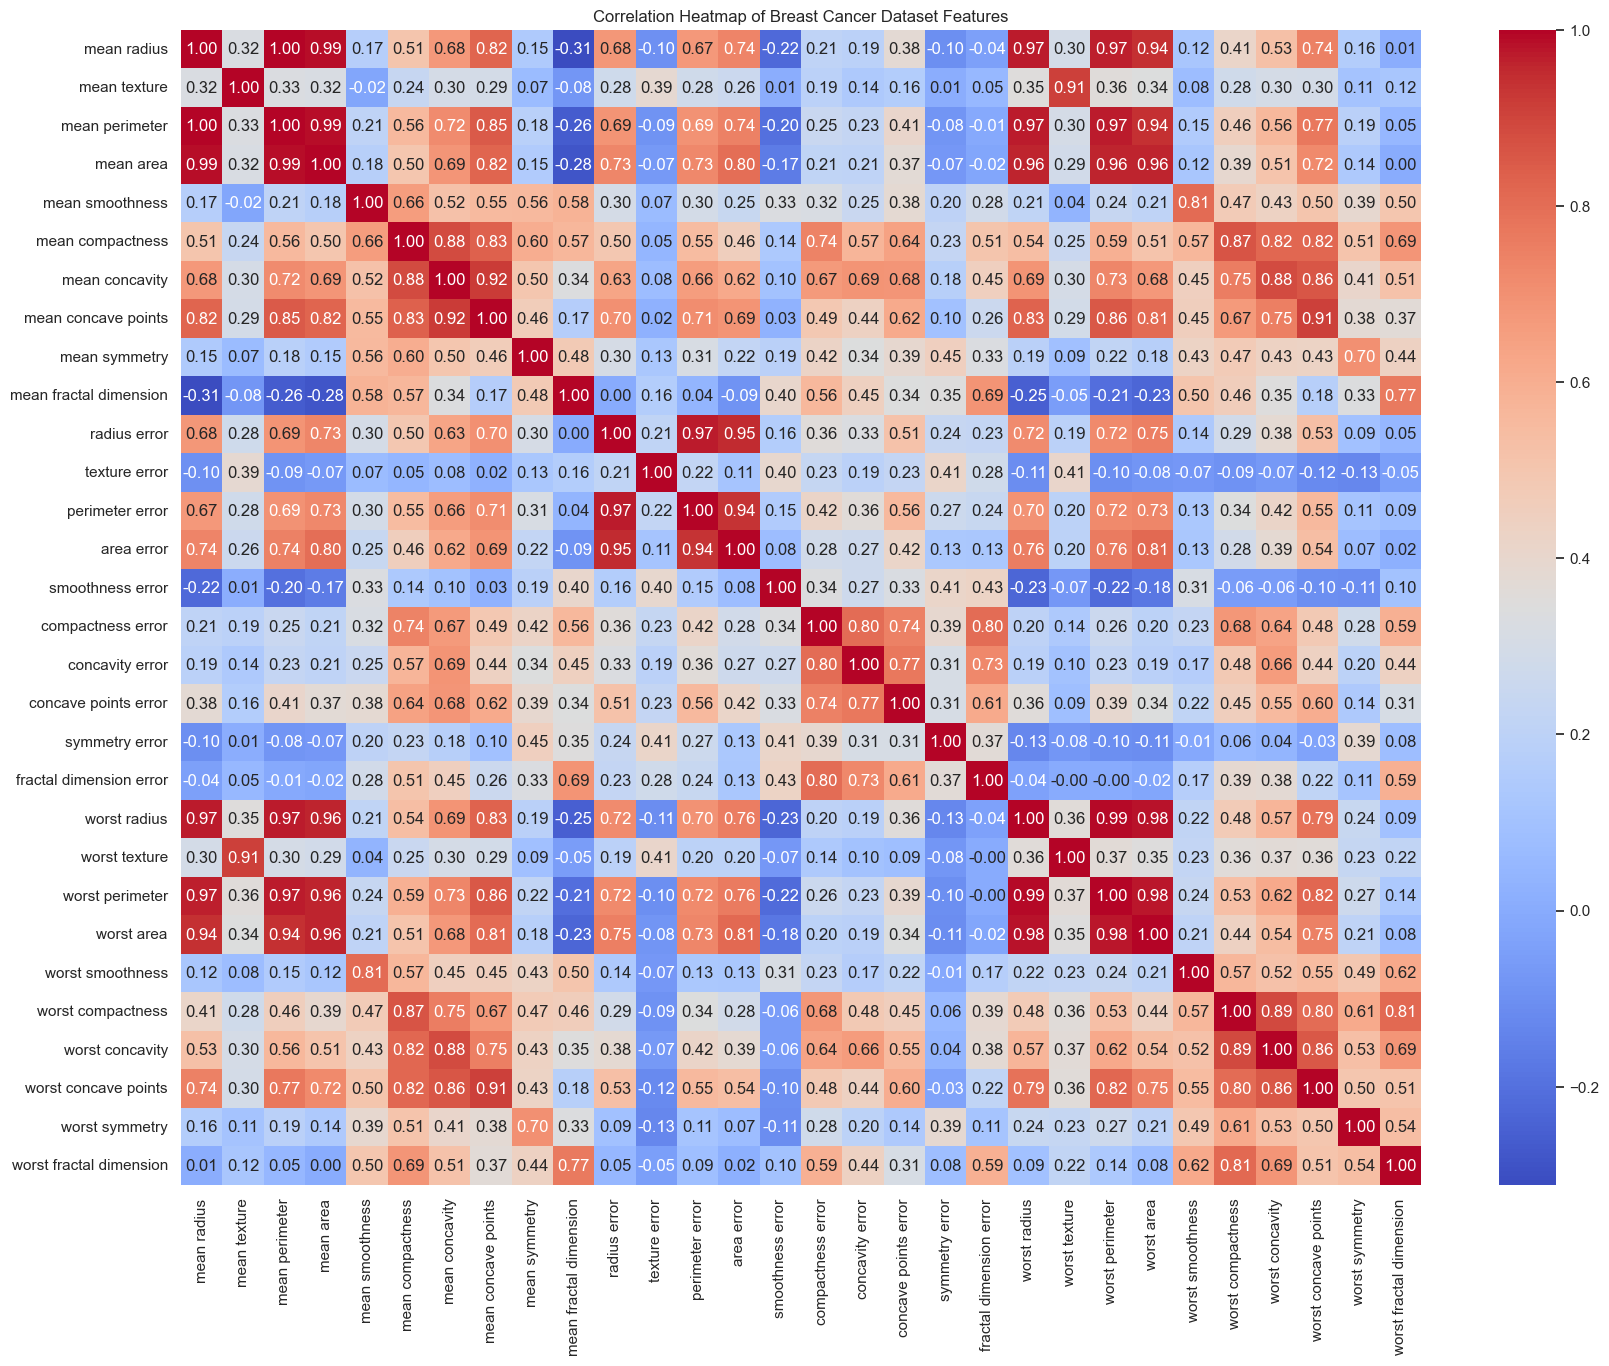

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 加載乳腺癌數據集
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 計算特徵之間的相關係數
correlation_matrix = X.corr()

# 繪製相關係數矩陣的熱力圖
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Breast Cancer Dataset Features')
plt.show()


 <font color=mediumseagreen>觀察</font>：
 
 透過Heatmap的形式產生的相關係數圖，可以發現圖中有幾塊區域的顏色較深、相關係數皆大於0.9，其中大致可以看出4處顏色較深的部分。例如圖片中左上角的變數 mean radius 平
 均半徑、mean perimeter 平均周長、mean area 平均面積三個變數之間具有相當高的相關係數。直觀的可以發現因為腫瘤的面積大小、半徑、周長皆皆可以透過計算得知。而右下方的深色區塊則方向相同，但是顯示的是最小面積、半徑、周長。再來是左下方顯示平均面積、半徑、周長與最小面積、半徑、周長的相關係數。最後則是中間部分的 perimeter error 、area error 、radius error。

<hr>
習題2

第 2 題：

繪製一張含每個量測變數的盒鬚圖，觀察每個變數的 scaling，作為是否標準化的參考

 <font color=lightsteelblue>以下程式碼將繪製一張含每個變數的盒鬚圖以觀察其資料分布，最後再繪製一張資料標準化後的盒鬚圖。</font>

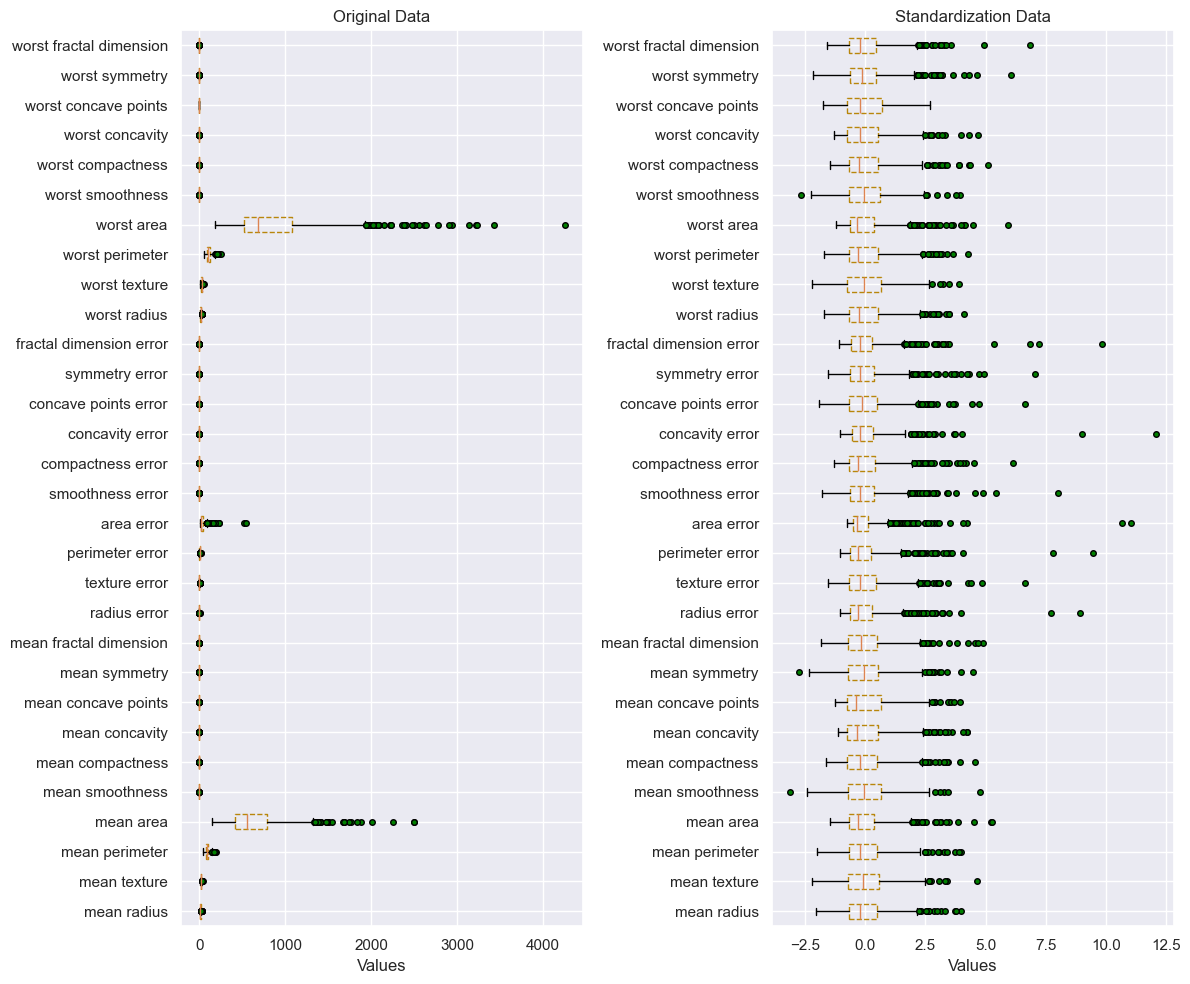

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 加載乳腺癌數據集
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

categories = X.columns

scaler_ = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler_.fit(X)
# Apply transform to dataset.
data_std = scaler_.transform(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Original data box plot
axes[0].boxplot(X, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')

# Standardized data box plot
axes[1].boxplot(data_std, boxprops=dict(linestyle='--', linewidth=1, color='darkgoldenrod'),
                flierprops=dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none'),
                labels=categories, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('Standardization Data')

plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

 透過第一張盒鬚圖且資料尚未標準化，可以發現大部分的資料分布都極小，除了面積相關的變數如 worst area、area error、mean erroe等。因此為了要確定是否有其他變數事實上與乳癌腫瘤的發生具有淺在的重要因素，因此對資料進行標準化如第二張盒鬚圖所示。

<hr>
習題2

第 3 題：

進行主成分分析

 <font color=lightsteelblue>以下程式碼將繪製特徵值由大而小的分布，包含 scree plot與累積百分比的 pareto plot</font>

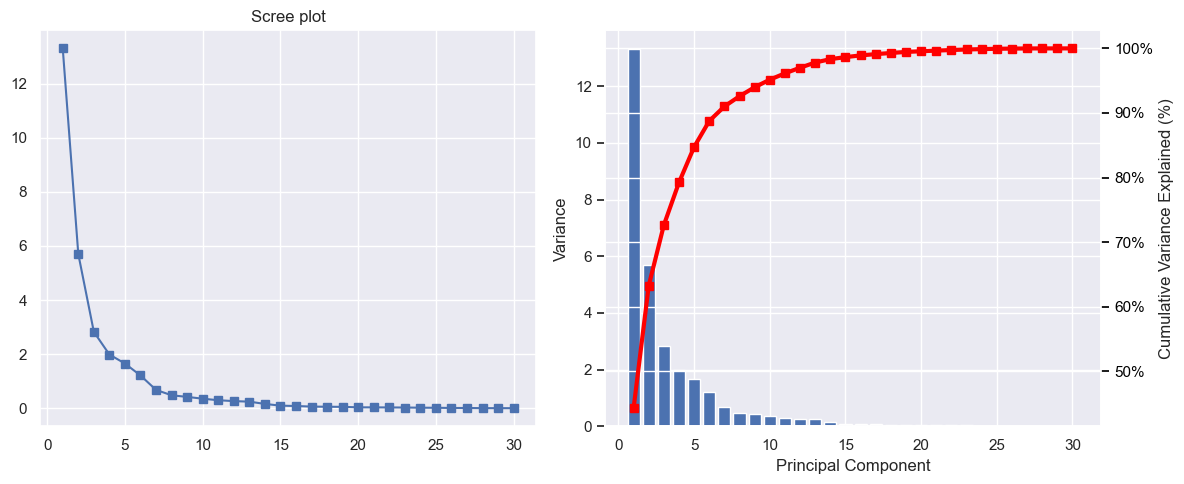

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ratings_ is assumed to be a 329 by 9 data matrix

# Calculate covariance matrix
Sx = np.cov(data_std.T, bias=False)
N = ratings_.shape[0]
mu_x = data_std.mean(axis=0)
Tmp = data_std - mu_x
Sx_formula = Tmp.T @ Tmp / (N - 1)

# Compute eigenvalues and eigenvectors
w, v = np.linalg.eig(Sx)
idx = np.argsort(-w)  # sort eigenvalues in descending order
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(1, 1 + len(eigvals))
axes[0].plot(x, eigvals, marker='s')
axes[0].set_title('Scree plot')
axes[0].grid(True)

# Bar plot with cumulative variance explained
axes[1].bar(x, eigvals)
axes2 = axes[1].twinx()
axes2.plot(x, eigvals.cumsum() / eigvals.sum() * 100, marker='s', color='red', lw=3)
axes2.tick_params(axis='y', colors='black')
axes2.yaxis.set_major_formatter(PercentFormatter())
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Variance')
axes2.set_ylabel('Cumulative Variance Explained (%)')

plt.tight_layout()
plt.show()

 <font color=mediumseagreen>觀察</font>：

左圖表顯示了每個主成分的特徵值（eigenvalues），特徵值表示了原始資料中每個主成分（eigenvector）所對應的變異量大小。
點與點之間斜率的變代表著該主成分所解釋的變異量大小。
因此根據左圖，可以到第一個主成分到第三個主成分之間的斜率皆較大且為遞減，表示若添加第三個以後的主成分對於總變異無太多影響。

右圖顯示了每個主成分的特徵值以及累積的方差百分比。
紅色曲線代表累積變異百分比，橫軸同樣是主成分的編號。當主成分的數量增加時，該曲線顯示了對總體變異量的解釋程度如何逐漸增加。
長條圖則顯示了每個主成分的特徵值，即每個主成分解釋的單獨變異量。

通過這兩個圖表，可以觀察到前2個主成分大約佔了65%的變異，而前三個主成分則佔了超過70％的變異。

<hr>
習題2

第 4 、5 題：

每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察「做與不做」標準化的差別。

 <font color=lightsteelblue>以下程式碼將對原始資料以及標準化後資料繪製散佈圖，再依據每筆資料的標籤，在散佈圖上塗上不同顏色。</font>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


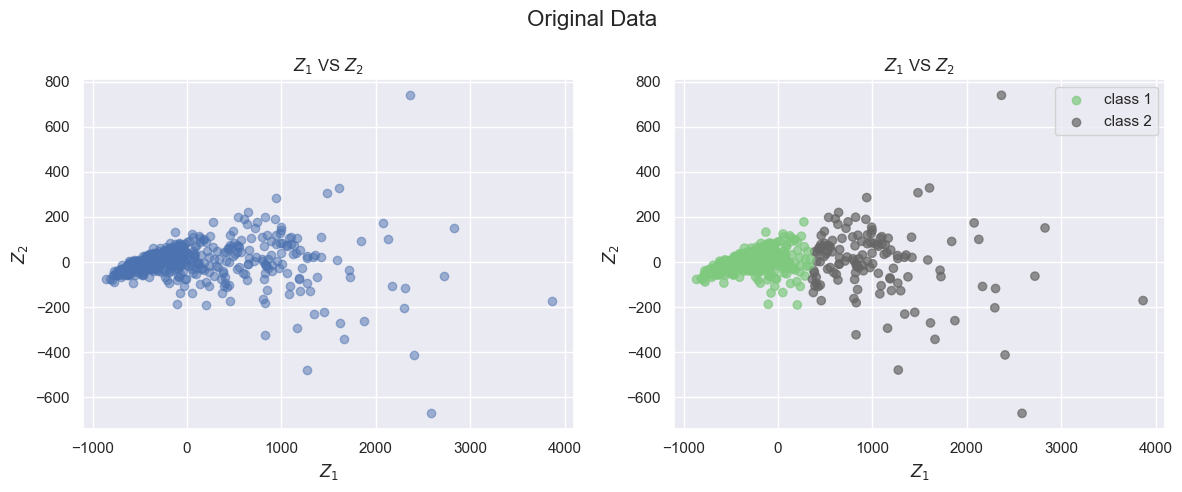

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(3)
labels = np.random.randint(0, 2, size=X.shape[0])  # Use ratings instead of ratings_

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)  # Use ratings instead of ratings_

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(principal_components)

# Scatter plot of the first two principal components with color-coded clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
axes[1].scatter(pc1, pc2, c=clusters, cmap='Accent', alpha=0.7)
axes[1].set_title('$Z_1$ VS $Z_2$')
axes[1].set_xlabel('$Z_1$')
axes[1].set_ylabel('$Z_2$')
axes[1].grid(True)

# Scatter plot for the second subplot
axes[0].scatter(pc1, pc2, alpha=0.5)
axes[0].set_title('$Z_1$ VS $Z_2$')
axes[0].set_xlabel('$Z_1$')
axes[0].set_ylabel('$Z_2$')
axes[0].grid(True)

# Add labels for each cluster with custom colors
colors = plt.cm.Accent(np.linspace(0, 1, 2))  # Get colors from viridis colormap
for i, color in enumerate(colors):
    axes[1].scatter([], [], color=color, label=f'class {i+1}', alpha=0.7)

axes[1].legend()
fig.suptitle('Original Data', fontsize=16)
plt.tight_layout()
plt.show()



 <font color=mediumseagreen>觀察</font>：

此程式碼使用PCA將原始資料轉換為具有兩個主成分的新資料空間。接著將散點圖分為兩個子圖：左側顯示了未分群的散點圖，右側顯示分群後的散點圖，其中資料點根據其分配到的群體使用不同的顏色進行標記。
左側的散點圖顯示了原始資料在 PCA 空間中的分布，其中 x 軸和 y 軸分別代表了第一和第二個主成分。這個圖表可以幫助我們了解原始資料的結構和分佈情況。
右側的散點圖顯示了進行 K-means 聚類後的結果。不同顏色的點表示被分配到不同聚類中的資料點。這有助於我們視覺化潛在的資料結構和群組之間的差異。

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


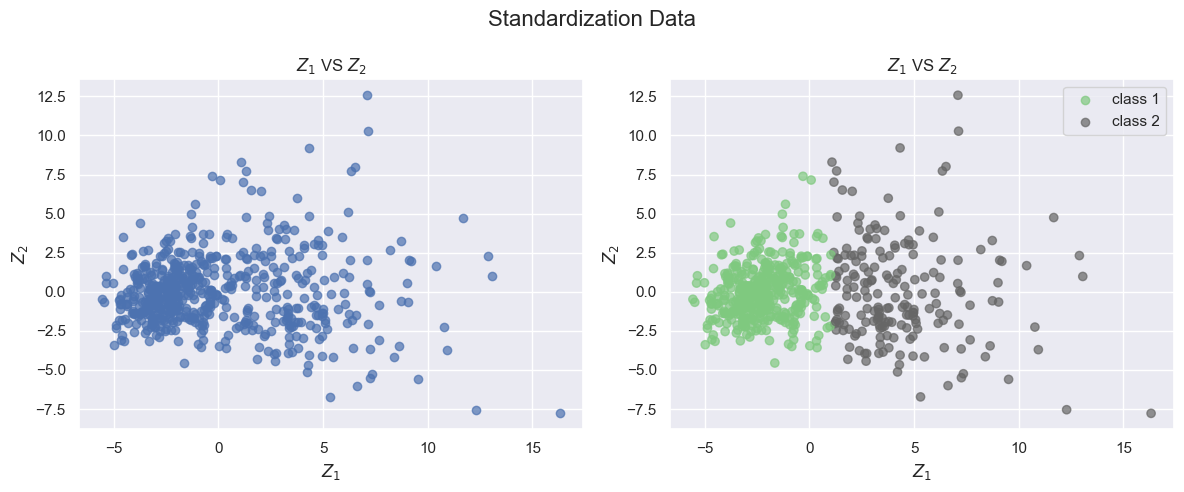

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(4)
labels = np.random.randint(0, 2, size=data_std.shape[0])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=2, random_state=0)  # Changed n_clusters to 2
clusters = kmeans.fit_predict(principal_components)

# Scatter plot of the first two principal components with color-coded clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
axes[1].scatter(pc1, pc2, c=clusters, cmap='Accent', alpha=0.7)
axes[1].set_title('$Z_1$ VS $Z_2$')
axes[1].set_xlabel('$Z_1$')
axes[1].set_ylabel('$Z_2$')
axes[1].grid(True)

# Scatter plot for the second subplot
axes[0].scatter(pc1, pc2, alpha=0.7)
axes[0].set_title('$Z_1$ VS $Z_2$')
axes[0].set_xlabel('$Z_1$')
axes[0].set_ylabel('$Z_2$')
axes[0].grid(True)

# Add labels for each cluster with custom colors
colors = plt.cm.Accent(np.linspace(0, 1, 2))  # Changed from 3 to 2 clusters
for i, color in enumerate(colors):
    axes[1].scatter([], [], color=color, label=f'class {i+1}', alpha=0.7)

axes[1].legend()

fig.suptitle('Standardization Data', fontsize=16)
plt.tight_layout()
plt.show()


 <font color=mediumseagreen>觀察</font>：

在上述的程式碼中，首先將原始資料進行了標準化處理。即是將每個特徵的平均值調整為 0，標準差調整為 1。有助於消除不同特徵之間的尺度差異，使每個特徵對模型的影響程度更加平等。接著執行如前一段程式碼相同的過程，產生原始資料和標準化後資料的散佈圖。

觀察標準化前後的兩張資料散佈圖，標準化後資料的分佈相對於原始資料更加集中，各個特徵的變異性被均勻地分散到相同的範圍內。這有助於更清晰地觀察資料的結構和群集之間的關係。
因此總結來說，標準化後的資料能夠提供更好的分析和模型建構基礎，因為消除了特徵之間的尺度差異，使得不同特徵對模型的貢獻更加平等。

<hr>
習題2

第 6 題：

如果採三個主成分，則可繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野

 <font color=lightsteelblue>以下程式碼將使用主成分分析並採取三個主成分並繪製立體圖，並試著找出分群的結果。</font>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


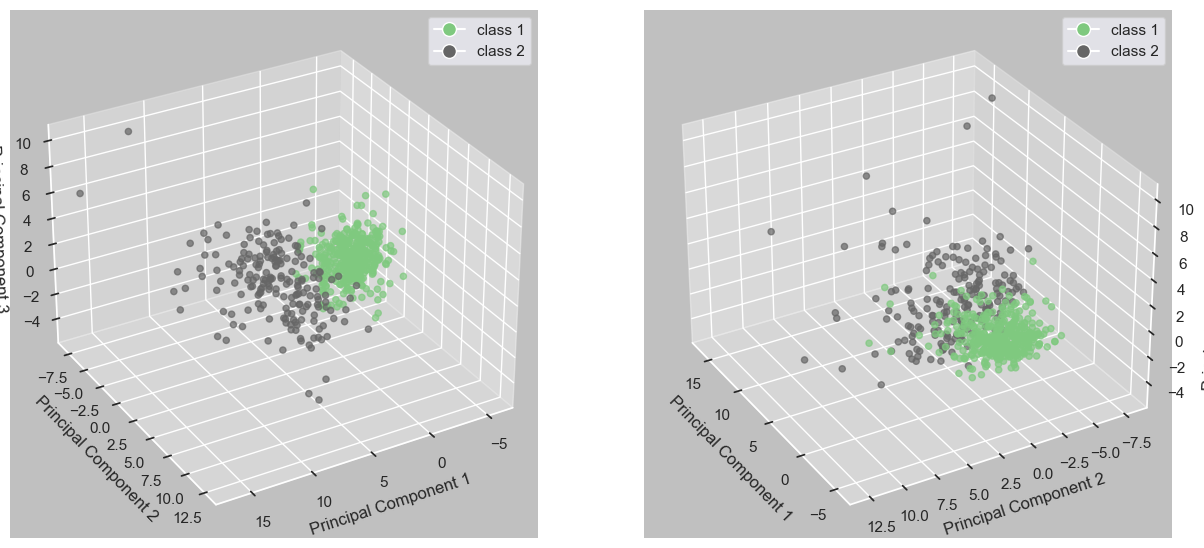

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors  # Import mcolors for colormap manipulation

# Ensure 3D plots are interactive
plt.ion()

# Assuming ratings_ is your data matrix
# Assuming labels is your vector of labels for each data point

# Generate random labels for demonstration purpose
np.random.seed(5)
labels = np.random.randint(0, 2, size=data_std.shape[0])

# Perform PCA with three components
pca = PCA(n_components=3)  # Set n_components to 3 for three principal components
principal_components = pca.fit_transform(data_std)

# Extract the first three principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

# Fit K-means clustering to identify clusters
kmeans = KMeans(n_clusters=2, random_state=0)  # Change n_clusters to 2
clusters = kmeans.fit_predict(principal_components)

# Set background color
fig = plt.figure(figsize=(15, 7))

# Plot the original 3D scatter plot (left subplot)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_facecolor('#C0C0C0')
scatter1 = ax1.scatter(pc1, pc2, pc3, c=clusters, cmap='Accent', alpha=0.7)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.view_init(elev=30, azim=60)  # Change the viewing angle

# Plot the 3D scatter plot with adjusted viewing angle (right subplot)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_facecolor('#C0C0C0')
scatter2 = ax2.scatter(pc1, pc2, pc3, c=clusters, cmap='Accent', alpha=0.7)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.view_init(elev=30, azim=150)  # Change the viewing angle

# Add legend with custom color labels to the second subplot
cmap = plt.get_cmap('Accent')
norm = mcolors.Normalize(vmin=0, vmax=1)  # Change vmax to 1 for 2 clusters
viridis_colors = [cmap(norm(i)) for i in range(2)]  # Change range to 2 for 2 clusters
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[0], markersize=10, label='class 1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[1], markersize=10, label='class 2')]
ax2.legend(handles=legend_elements)
ax1.legend(handles=legend_elements)

plt.show()


 <font color=mediumseagreen>觀察</font>：
 
 透過採取三個主成分、繪製立體圖並進行分群，我們可以觀察到兩個明顯的群組。或許可以猜測是惡性腫瘤與良性腫瘤的不同特徵所導致的分群結果。


<hr>
習題2

第 7 題：

$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

 <font color=lightsteelblue>以下程式碼將呈現第一個主成分中各個變數所對應的權重，並繪製折線圖以利觀察。</font>

mean radius: 0.2189024437000028
mean texture: 0.10372457821570576
mean perimeter: 0.22753729300562558
mean area: 0.22099498538593998
mean smoothness: 0.14258969436023813
mean compactness: 0.2392853539530007
mean concavity: 0.2584004812487714
mean concave points: 0.2608537583857403
mean symmetry: 0.1381669593036495
mean fractal dimension: 0.06436334637177431
radius error: 0.20597877585525307
texture error: 0.01742802814895044
perimeter error: 0.21132591637549444
area error: 0.20286963544140463
smoothness error: 0.014531452147837355
compactness error: 0.1703934512074589
concavity error: 0.15358978973979007
concave points error: 0.18341739696412876
symmetry error: 0.04249842163303862
fractal dimension error: 0.10256832209557644
worst radius: 0.2279966342324723
worst texture: 0.10446932545719402
worst perimeter: 0.23663968074164524
worst area: 0.22487053273420546
worst smoothness: 0.12795256119285894
worst compactness: 0.21009588015782696
worst concavity: 0.22876753281500933
worst concave 

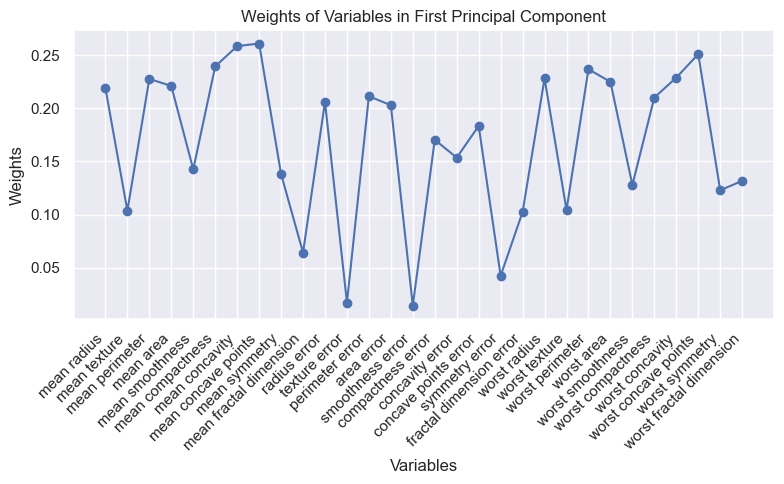

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 創建PCA實例
pca = PCA()

# 適配PCA模型
pca.fit(data_std)

# 提取第一個主成分的權重
weights_first_pc_1 = pca.components_[0]

# 將權重與變數名稱對應起來
variables = categories
weights_and_variables_Z1 = list(zip(variables, weights_first_pc_1))

# 印出第一個主成分的權重與變數組合
for variable, weight in weights_and_variables_Z1:
    print(f"{variable}: {weight}")

# 解壓變數和權重
variables, weights = zip(*weights_and_variables_Z1)

# 繪製折線圖
plt.figure(figsize=(8, 5))
plt.plot(variables, weights, marker='o', linestyle='-')
plt.title('Weights of Variables in First Principal Component')
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.xticks(rotation=45, ha='right')  # 旋轉x軸標籤，以便更好顯示
plt.tight_layout()
plt.show()

 <font color=mediumseagreen>觀察</font>：

透過上述產生的權重與對應變數名稱，可以得知第一個主成分與原變數的關係為：
$$第一個主成分=0.22*mean\_radius+0.103*mean\_texture......+0.13*worst\_fractal\_dimension$$
而影響第一個主成分較顯著的變數中，最高的幾項變數分別是 mean concave points 平均凹陷分數、mean concavity 平均凹度、worst concave points 最小凹陷分數、mean compactness 平均緊密度。而這些變數在第1題的相關係數圖中彼此間的相關性都大於0.8，因此認為這些變數確實對於第一個主成分有相當高的影響。




mean radius: -0.23385713174743042
mean texture: -0.05970608829172962
mean perimeter: -0.21518136139677121
mean area: -0.23107671128386564
mean smoothness: 0.18611302267051938
mean compactness: 0.15189161007332497
mean concavity: 0.0601653627986613
mean concave points: -0.03476750049374733
mean symmetry: 0.19034877037225095
mean fractal dimension: 0.36657547137825636
radius error: -0.10555215182583438
texture error: 0.08997968182917024
perimeter error: -0.0894572342211039
area error: -0.15229262810533795
smoothness error: 0.20443045303003185
compactness error: 0.23271589619008107
concavity error: 0.1972072827112569
concave points error: 0.13032155990733008
symmetry error: 0.18384799994473733
fractal dimension error: 0.28009202661238625
worst radius: -0.21986637929991054
worst texture: -0.04546729826988873
worst perimeter: -0.19987842794100003
worst area: -0.21935185792265313
worst smoothness: 0.17230435165173638
worst compactness: 0.14359317327192564
worst concavity: 0.09796411433577674

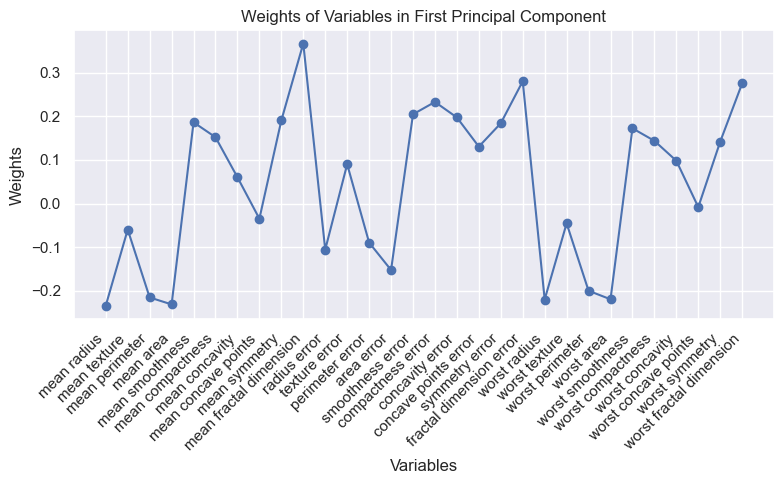

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 創建PCA實例
pca = PCA()

# 適配PCA模型
pca.fit(data_std)

# 提取第二個主成分的權重
weights_first_pc_1 = pca.components_[1]

# 將權重與變數名稱對應起來
variables = categories
weights_and_variables_Z1 = list(zip(variables, weights_first_pc_1))

# 印出第一個主成分的權重與變數組合
for variable, weight in weights_and_variables_Z1:
    print(f"{variable}: {weight}")

# 解壓變數和權重
variables, weights = zip(*weights_and_variables_Z1)

# 繪製折線圖
plt.figure(figsize=(8, 5))
plt.plot(variables, weights, marker='o', linestyle='-')
plt.title('Weights of Variables in First Principal Component')
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.xticks(rotation=45, ha='right')  # 旋轉x軸標籤，以便更好顯示
plt.tight_layout()
plt.show()

 <font color=mediumseagreen>觀察</font>：

透過上述產生的權重與對應變數名稱，可以得知第二個主成分與原變數的關係為：
$$第二個主成分=-0.23*mean\_radius-0.06*mean\_texture......+0.28*worst\_fractal\_dimension$$
而影響第二個主成分較顯著的變數中，最高的分別是 mean fractal dimension 平均分形維數、fractal dimension error 分形維數錯誤、worst fractal dimension 最小分形維數。其中們分形維數測量是使用透射光學顯微鏡檢測癌症不同階段的潛在技術。

其中這些變數在第1題的相關係數表中，彼此間的相關性大約落在0.6左右。因此從第二個主成分中，可以發現其中的這些權重較高的變數彼此間的相關係數都沒有第一個主成分中的變數高，驗證了主成分的變異量佔比會隨著順序遞減。

